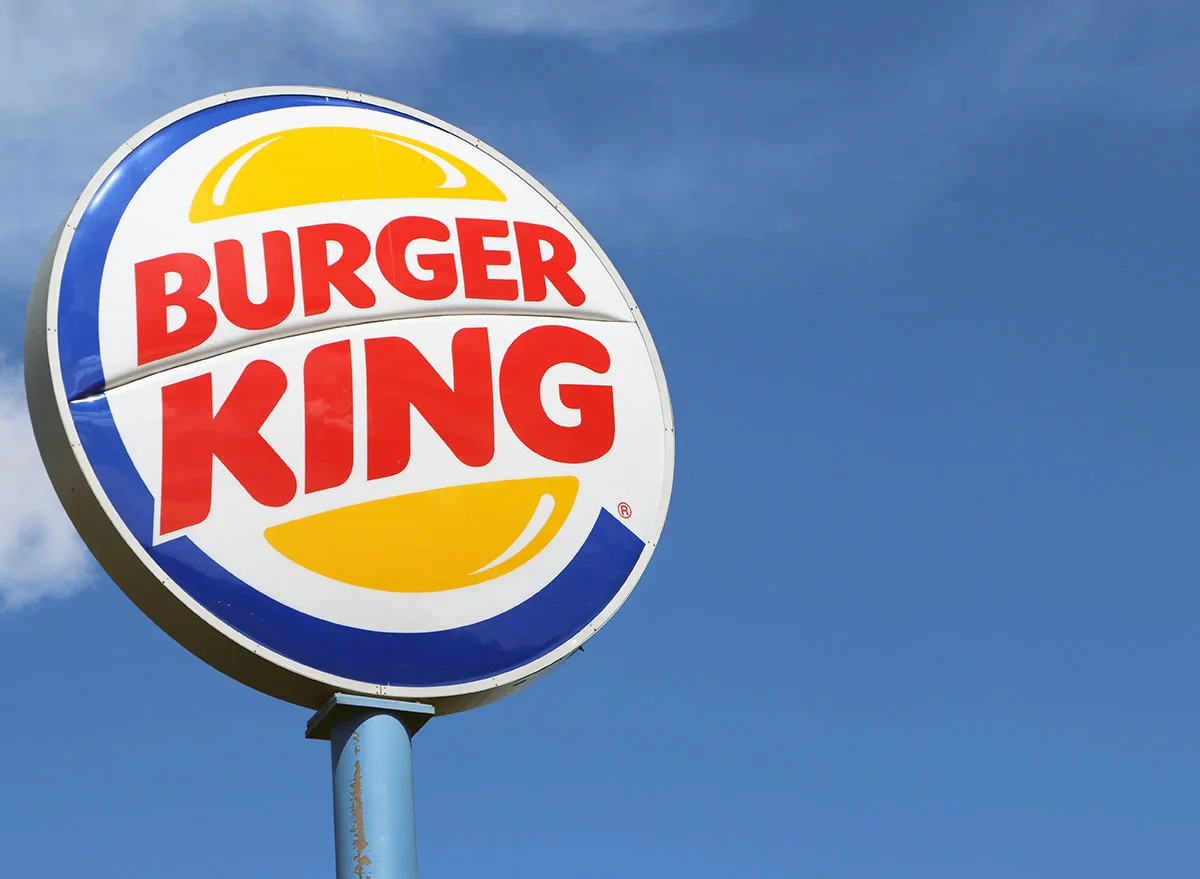

<h1 align="center"> Sentiment Analysis </h1>

<h2>About:  </h2>

By using reviews of Burger King on Yelp we are able to get the sentiment on the resturant.

# 1. Install and Import Dependencies

In [33]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [34]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [35]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

# 2. Instantiate Model

In [36]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# 3. Encode and Calculate Sentiment

In [37]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [38]:
result = model(tokens)

In [39]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward>)

In [40]:
int(torch.argmax(result.logits))+1 #

4

# 4. Collect Reviews

In [41]:
r = requests.get('https://www.yelp.com/biz/burger-king-fortuna')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [43]:
reviews

["I ordered a BK Bacon and Swiss Cheese Royal Crispy Chicken through the drive though, and when I got to the window, the guy at the window opened the window panes and made me wait to collect my money while he continued his conversation with his co-worker. A conversation that was rather unimportant about some chick. No greeting, he was just standing there flapping his gums while I waited to hear my total again and hand him the money. Ok, at the end of the day I don't really care if someone doesn't greet me. Common courtesy aside, it's whatever. The guy took my money, continued his conversation, barely acknowledged me, and didn't even give me a receipt (I track my cash expenses and now can't tell you how much this debacle cost me), but he did give me ranch. Now, the guy didn't make my burger so I can't fault him for the fact that my sandwich is missing the lettuce and tomatoes, which I happen to very much enjoy on a sandwich. But I could probably point out a systemic failure of leadershi

# 5. Load Reviews into DataFrame and Score

In [44]:
import numpy as np
import pandas as pd

In [45]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [46]:
df['review'].iloc[0]

"I ordered a BK Bacon and Swiss Cheese Royal Crispy Chicken through the drive though, and when I got to the window, the guy at the window opened the window panes and made me wait to collect my money while he continued his conversation with his co-worker. A conversation that was rather unimportant about some chick. No greeting, he was just standing there flapping his gums while I waited to hear my total again and hand him the money. Ok, at the end of the day I don't really care if someone doesn't greet me. Common courtesy aside, it's whatever. The guy took my money, continued his conversation, barely acknowledged me, and didn't even give me a receipt (I track my cash expenses and now can't tell you how much this debacle cost me), but he did give me ranch. Now, the guy didn't make my burger so I can't fault him for the fact that my sandwich is missing the lettuce and tomatoes, which I happen to very much enjoy on a sandwich. But I could probably point out a systemic failure of leadership

In [47]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [48]:
sentiment_score(df['review'].iloc[1])

1

In [49]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [50]:
df

,review,sentiment
0,I ordered a BK Bacon and Swiss Cheese Royal Cr...,2
1,Complete DISASTER! It's sad whats happened to ...,1
2,I've had pretty good experiences at this resta...,4
3,This joint is a disgrace! At least 5-times I'v...,1
4,Unlike all of the other reviews here - I had a...,5
5,Nothing wrong with this BK! Standard cleanline...,5
6,My first experience at this location was June ...,2
7,I love Burger King but definitely plan on wait...,3
8,If you ever think you know what you're going t...,2
9,I come here for breakfast with my young boys o...,5


In [53]:
df['review'].iloc[3]

"This joint is a disgrace! At least 5-times I've drove up in the Drive thru and ordered tacos. Every time the said no tacos today. So I had to wait in line until everyone in front of me got their order. How hard is it to make a taco?Absolutely the worst customer service I have ever experienced!"